# 1. Tutorial: Create iML1515 GECKO

## Prerequisites
A fundamental understanding of genome-scale metabolic models (GEM) (Orth et al., 2010a) and flux balance analysis (FBA) (Orth et al., 2010b) is imperative for a comprehensive grasp of this subject matter. Individuals lacking this prerequisite are advised to employ the cobrapy (Ebrahim et al., 2013)  software and adhere to the provided tutorial to acquire the requisite skills (https://cobrapy.readthedocs.io). Optimization of models necessitates the installation of a solver on the user's system; for less complex models, the open-source GNU GLPK solver is adequate, but for more complex models, the utilization of commercial solvers such as Gurobi or IBM CPLEX is essential. These commercial solvers are available for free trial purposes and offer complimentary academic licenses, facilitating the analysis of complex models. The f2xba extended modeling package must be installed from PyPI, e.g., via `pip --install f2xba`. This also installs sbmlxdf, a powerful converter between SBML and table formats, and libSBML (Bornstein et al., 2008).

## Background
Flux balance analysis (FBA) is a robust methodology for simulating metabolic networks under various environmental and genetic conditions and has been used for many years (Watson, 1986). Genome-scale metabolic models (GEMs) delineate species (metabolites) within metabolic networks and their connectivity via reactions. Through gene product association, reactions can be linked to genes on the genome, coding for gene products (proteins) that comprise the enzymes catalyzing the reaction. Metabolic reactions can be spontaneous, i.e., not requiring any enzyme for catalysis, or be enzyme catalyzed. Enzyme catalyzed reactions in a GEM can be catalyzed by a single enzyme or by different isoenzymes (isozymes).

FBA can be formulated as a linear programming (LP) problem, with optimization variables representing reaction fluxes that are bounded. The constraints are mass balance constraints for metabolites, ensuring that the production of a metabolite via metabolic reactions is balanced with its consumption by other reactions. The matrix coefficients correspond to the stoichiometric coefficients of the biochemical reaction. A frequently used objective function is the maximization of the growth rate, represented by a biomass reaction. The solutions to the FBA optimization problem correspond to non-unique reaction flux distributions that satisfy the constraints and variable bounds for a given optimization objective. While FBA has been demonstrated to make reasonable predictions regarding the phenotypic behavior, such as growth and excretion rates, it falls short in predicting which of the reactions or pathways in a highly meshed metabolic network carry the fluxes and to what extent.

Extended genome-scale metabolic networks add constraints to the optimization problem relating to protein investment and/or thermodynamics, thereby allowing them to provide insight into the detailed functioning of the metabolic network. In essence, FBA can be regarded as a predictor of the macroscopic behavior of metabolic networks, while extended models offer insights into the intricate functioning of these networks.

## General 
The most recent genome-scale metabolic network reconstruction of *Escherichia coli* is iML1515 (Monk et al., 2017). Those versed in FBA may already be acquainted with this model, and it will serve as the baseline GEM for all extended models created in this set of tutorials. The tutorials will cover a range of extended model types, including the enzyme constraint GECKO (Sánchez et al., 2017), the resource balance constraint RBA (Bulović et al., 2019; Goelzer et al., 2011), and the thermodynamics constraint TFA (Henry et al., 2007; Salvy et al., 2019) model. Growth balance analysis (GBA) models (Dourado & Lercher, 2020), which include detailed kinetic functions, could be integrated in a future tutorial once implemented in f2xba.

The implementation of these models has been adapted to enhance model configuration, optimization, and combination. For instance, the TFA model can be integrated with the GECKO model to form a composite model, referred to as TGECKO. This comprehensive endeavor will be facilitated by the Python package f2xba, which serves as an extended modeling framework.

All extended models will be stand-alone models and coded in SBML (Systems Biology Markup Language), see (Hucka et al., 2019), a standardized format utilized in the domain of systems biology. This format facilitates the sharing of models and is supported by numerous modeling and optimization tools, including cobrapy.

Cobrapy is capable of importing all models created in this study, and it can optimize GECKO models in a manner analogous to its optimization of FBA models. TFA and TGECKO models, which are constrained by thermodynamics, necessitate a few additional lines of code to configure binary variables employed in MILP (Mixed Integer Linear Programming) and to configure inequality constraints. RBA and TRBA models require support from features in the f2xba package to reconfigure parameters of the RBA feasibility problem and implement the bisection algorithm.

Extended models introduce new types of optimization variables, e.g., protein concentrations. The f2xba package implements features that support the separation of different types of variables extracted from the optimization solution, and it also adds postprocessing to improve the presentation of results. This includes the generation of plots that show the correlation between predicted and measured growth rates and protein concentrations. Optimization results can be exported in a format that can be loaded into Escher (King, Dräger, et al., 2015) for graphical presentation of predicted flux or protein concentrations. Consequently, we employ the f2xba package consistently for model optimization and results analysis.

Our models will be optimized to maximize growth rate under different minimal media conditions. The predicted growth rates (1/h) and predicted protein concentrations (mg/gP – mg protein per gram total protein) will be compared to experimental data for growth rates (Adadi et al., 2012) and proteomics (Schmidt et al., 2016). The primary objective is to enhance the correlation between predicted and measured protein concentrations.

In order to ensure backwards compatibility, f2xba provides support for optimization through the utilization of the well-known cobrapy interface. Additionally, f2xba offers an alternative direct interface via gurobipy, a measure that can lead to a substantial reduction in the time required for model loading and optimization, particularly for more extensive and intricate models. To demonstrate this enhancement, an experiment was conducted using a MacBook Pro 2019, which is equipped with a 2.4 GHz 8-Core Intel i9 processor. The thermodynamics enabled RBA model of iML1515 (iML1515_TRBA.xml) was utilized, and the resultant loading time was recorded as 37 seconds. In contrast, the cobrapy interface requires 172 seconds for the same process. Additionally, the growth rate optimization across six distinct nutrient conditions is achieved in 195 seconds using gurobipy, whereas cobrapy requires 1226 seconds, indicating a factor of 6.3.

The tutorials should be executed in the sequence dictated by their numbering, thereby enabling an incremental enhancement in the predictive quality and complexity of the models. The process commences with the utilization of rudimentary default parametrizations, which are subsequently refined through workflows designed for the manual identification and adjustment of critical model parameters. The integration of AI-predicted turnover numbers (kcat values) and the automated tuning of turnover numbers to proteomics data will also be addressed.

## Other organisms
The workflows delineated herein can be applied to generate extended models of other organisms, provided that a SBML-coded GEM exists that can be analyzed by FBA. Ideally, this GEM is well curated and annotated, on the level of the iML1515 GEM, thereby facilitating the automated creation of extended models with limited manual configuration. Gene identifiers employed in the model must align with locus tags from the genome annotation to facilitate the automatic retrieval of protein-related data from the NCBI genome and/or UniProt (The UniProt, 2023) protein database. Additionally, genes can be annotated with UniProt identifiers, thereby facilitating a UniProt lookup. Metabolites in the model should be linked to identifiers in external databases, such as KEGG (Kanehisa & Goto, 2000) compound identifiers, which are used to retrieve AI-predicted turnover numbers from the TurNuP web portal (Kroll et al., 2023) and SEED identifiers (Henry et al., 2010), which are used to retrieve thermodynamics-related data from a thermodynamics database, extracted from the pytfa (Salvy et al., 2019) repository (https://github.com/EPFL-LCSB/pytfa/raw/refs/heads/master/data/thermo_data.thermodb). It should be noted that not all published GEMs of organisms satisfy this high-quality level of annotation. In such cases, two options are suggested. The first option is to update the GEM with annotation data, potentially extracted from the supporting information of the respective publication. The Python package sbmlxdf provides support for such model updates. The second option is to add relevant annotation and mapping data to the extended model configuration data. The efficacy of these approaches has been demonstrated in generating extended models of **yeast9** (Zhang et al., 2024), a GEM for *Saccharomyces cerevisiae*, **iJN678** (Nogales et al., 2012), a GEM of *Synechocystis* sp. PCC 6803, and **MMSYN** (Breuer et al., 2019), a GEM for the synthetic cell JCVI-Syn3A, which is based on *Mycoplasma mycoides capri*.

## This Tutorial
In this initial tutorial, the process of creating an enzyme constraint GECKO model based on an existing genome-scale metabolic model (FBA model) will be demonstrated. The GECKO model will be implemented according to the GECKO formulation (Sánchez et al., 2017), with minor adjustments intended to enhance the model structure. This first model primarily utilizes default parametrization, thereby requiring minimal manual configuration. Manual configurations will be explicitly coded and converted into spreadsheet tables, stored as Microsoft Excel files. Alternatively, configuration files can be created and managed directly using a spreadsheet program, such as Microsoft Excel.

A GECKO model couples enzyme-catalyzed reactions to protein requirements and places an upper limit on total protein (Sánchez et al., 2017). The f2xba program utilizes a GEM and several configuration files as input to create an enzyme constraint GECKO model by executing a sequence of steps. Enzyme-catalyzed reactions are split into forward and reverse directions when reversible in the GEM and per isoenzyme. For instance, the reversible reaction with the identifier 'R_FBA' in the GEM, catalyzed by two isoenzymes, is replaced by four reactions with identifiers 'R_FBA_iso1', 'R_FBA_iso2', 'R_FBA_iso1_REV' and 'R_FBA_iso2_REV'. Non-negative protein concentration variables are added, with identifiers 'V_PC_\<uniprotID\>' and for total modeled protein ('V_PC_total'). These variables are incorporated into the SBML reaction components in units of milligrams per gram of dry weight (mg/gDW). An upper bound on the total modeled protein is configured, and reaction fluxes are coupled to protein requirements according to the following general formulation:

\begin{equation}
flux ≤ kcat \cdot n\_AS \cdot avg\_enz\_sat \cdot \frac{[P]}{stoic \cdot MW}
\end{equation}

The *flux* is expressed in mmol/gDW, *kcat* denotes the turnover number in 1/h, *stoic* signifies the number of protein copies in the catalyzing enzyme, *n_AS* indicates the number of active sites in the enzyme, *\[P]* represents the protein concentration in mg/gDW, *MW* denotes the protein molecular weight in g/mol, and *avg_enz_sat* refers to the average enzyme saturation level. It is noteworthy that the average enzyme saturation can attain non-pysiological values greater than 1.0 to predict measured growth rates. In the context of the optimization problem, the inequality is replaced by an equality. Coupling factors $CC_{ij}$ for protein *i* and reaction *j* are introduced, according to the formula:

\begin{equation}
CC_{ij} = \frac{stoic_{ij} \cdot MW_i } {(kcat_{ij} \cdot n\_AS_{ij} \cdot avg\_enz\_sat)}
\end{equation}

Consequently, protein mass balance constraints are incorporated, with ids 'C_prot_<uniprotID>' and total modeled protein ('C_prot_pool'). These constraints are incorporated into the SBML species components. The individual and total protein mass balance constraints are configured using the formula: 

\begin{equation}
C\_prot_i:   \sum_j{CC_{ij} \cdot R_j} = V\_PC_i
\end{equation}

\begin{equation}
C\_prot\_pool: \sum_i{V\_PC_i} = V\_PC\_total
\end{equation}

$R_j$ being the flux carried by reaction j. The coupling constraints are added to the SBML reaction components as products and reactants.

The organization of this tutorial, as well as the subsequent tutorials, follows a consistent structure. However, the first tutorial does contain additional subsections that are intended to provide comprehensive explanations. The general structure of the tutorial is as follows:

- Initial setup
- Creation of configuration files
- Creation of an extended model and its storage as a SBML file
- Loading and optimization of the extended model using cobrapy
- Analysis of the optimization results
- Monitoring of the progress of the model's evolution
- Demonstration of loading and optimization of the extended model using gurobipy as an alternative to cobrapy

**Notes to reaction and species identifiers**: Cobrapy eliminates the leading `R_` and `M_` of reaction and metabolite/species identifiers from its user interface. However, when creating or modifying models, the original identifiers must be utilized.

It should be noted that the text has been refined using the DeepL Pro Write (https://www.deepl.com) tool.

Peter Schubert, Heinrich-Heine University Duesseldorf, Institute for Computational Cell Biology (Prof. Dr. M. Lercher), February, 2025

## Step 1: Initial Setup

It is imperative that this tutorial and the subsequent tutorials be executed from a dedicated working directory. This initial setup will create a directory structure, download the proteomics dataset and the foundational GEM from the Internet, import required Python packages, and set initial variables. 

### 1.1 create directory structure

The following directories will be created: `./data` will contain data files required for model generation and optimization, and our models will be written and loaded from `./SBML_models`. We can convert our models to Microsoft Excel spreadsheet format, which may be more convenient for interrogating the model structure. Such models will be stored under `./xlsx_models`. Growth rate and protein concentration correlation plots will be stored under `./plots`. Optimization results can also be exported in a format compliant with Escher maps, which are stored under the directory named `./escher`. Finally, a directory named `./tmp` is required to store temporary data during model generation.


In [1]:
# Create directory structure
import os

for directory in ['data', 'SBML_models', 'xlsx_models', 'escher', 'plots', 'tmp']:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f'{directory} created')

### 1.2 download proteomics data

The FBA model is employed to predict flux distributions in a metabolic network, while the GECKO model can additionally predict protein levels. The predictive quality of the GECKO models will be assessed by comparing predicted to measured protein concentrations across different nutrient conditions. A proteomics data table is retrieved from a GitHub repository. This table has been extracted from the literature (Schmidt et al., 2016) and has undergone minor corrections of protein and gene locus identifiers.

In [2]:
# Download proteomics data
try:
    import wget
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install wget
    import wget
    
base_url = 'https://github.com/SchubertP/f2xba/raw/refs/heads/main/docs/source/notebooks/'
fname = 'Ecoli_Schmidt_proteomics.xlsx'

full_fname = os.path.join('data', fname)
if not os.path.exists(full_fname):
    url = base_url + fname
    print(f'\ndownloading {fname} from {url}')
    wget.download(url, out=full_fname)
print(f'E. coli proteomics (based on Schmidt et al., 2016): {full_fname}')

E. coli proteomics (based on Schmidt et al., 2016): data/Ecoli_Schmidt_proteomics.xlsx


### 1.3 download iML1515.xml 

The iML1515 model serves as the foundational GEM, which can be obtained from the BiGG Models database through a straightforward procedure. To initiate the process, one must first access the BiGG Models database using a web browser (http://bigg.ucsd.edu). Within the database, the `iML1515` model, which is the metabolic model of *Escherichia coli* K-12 substr. MG1655, should be searched for. To initiate the download, navigate to the designated `Download COBRA model from the BiGG Database` section and select the `SMBL` file `iML1515.xml`. Thereafter, the model should be downloaded and copied to the `./SBML_models` directory.

### 1.4 import packages and set model names

The initial setup is concluded by importing the relevant classes and functions from the f2xba package. The core class for created extended models is `f2xba.XbaModel`. The class `f2xba.EcModel` contains methods targeted at enzyme constraint models, such as GECKO. Finally, `f2xba.utils.mapping_utils` contains some helper functions. The model names for the FBA model and our first GECKO model are also set.

In [3]:
# Required imports and model names
import os
import pandas as pd

from f2xba import XbaModel, EcModel
from f2xba.utils.mapping_utils import write_parameter_file

# Model names
fba_model = 'iML1515'
target_model = 'iML1515_default_GECKO'

## Step 2: Create configuration files

The generation of extended models necessitates the incorporation of additional parameters, such as enzyme turnover numbers or the number of protein copies in enzymes. The identification of reasonable values for these parameters represents a significant challenge in the development of extended models. A comprehensive GEM, accompanied by references to online databases, can be utilized by f2xba features to automatically assign parameter values, requiring minimal configuration. The initial GECKO model will be developed with minimal configuration. 

Two configuration files must be created and stored in Microsoft Excel format (.xlsx): one XBA configuration file to configure the XbaModel instance and one ECM configuration file used for the EcModel instance. These configuration files will be generated by Python code; alternatively, they could be created with a spreadsheet editor like Microsoft Excel.

### 2.1 create XBA configuration file

The creation of an extended model is initiated through the instantiation and configuration of an XbaModel instance, which reads in the foundational GEM and downloads online resources pertinent to the model. The downloaded data will be stored in the './data' directory.

The initial XBA configuration file comprises two data tables. The first table, designated as `generals`, encompasses general configuration data, including default kcat values (turnover numbers) in units of per second for metabolic reactions, denoted as `default_metabolic_kcat`,  and transporters, indicated as `default_transporter_kcat`. Within this context, a metabolic reaction is defined as a reaction where the participating metabolites (reactants and products) are located in a single compartment. Furthermore, organism-specific identifiers are established. These include the NCBI taxonomic identifier of the organism, designated as `organism_id`, which is employed to retrieve protein-specific data from UniProt. Additionally, the BioCyc (Karp et al., 2017) identifier, denoted as `biocyc_org_prefix`, is utilized to retrieve enzyme compositions. The BioCyc identifier is optional and should be employed only if BioCyc contains high-quality enzyme composition information for the organism. The directory location where organism-specific files are stored is defined by the variable `organism_dir`. The second table we created, `remove_gps`, is optional. It is used to selectively remove gene products configured in the GEM, such as dummy proteins or proteins where UniProt entries do not exist. This initial XBA configuration file will be extended in upcoming tutorials with more specific model configurations.

#### GECKO models for other organisms: 
The `organism_id` can be queried from the NCBI taxonomy database (Schoch et al., 2020) accessible via https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi. It is imperative that gene products (proteins) link to their corresponding UniProt entries. f2xba extracts the UniProt annotation from the SBML "annotation" element in the foundational GEM if available; otherwise, it attempts to locate the corresponding UniProt record based on the configured gene locus (SBML "label" attribute). In instances where UniProt entries are not available for the organism, a pseudo-UniProt file can be generated, for example, based on a protein BLAST, and stored in the designated `./data` directory. As an alternative, f2xba can retrieve protein-related information from NCBI genome data. The configuration of NCBI genome data retrieval will be addressed in a subsequent tutorial, where an RBA model will be created.

In [4]:
# Create XBA parameter file
xba_params = {}
data = [['default_metabolic_kcat', 12.5], 
        ['default_transporter_kcat', 100.0],  
        ['organism_dir', 'data'], 
        ['organism_id', 83333], 
        ['biocyc_org_prefix', 'ecoli']]
xba_params['general'] = pd.DataFrame(data, columns=['parameter', 'value']).set_index('parameter')

data = [['G_s0001', 'dummy gene product - spontaneous reactions']]
xba_params['remove_gps'] = pd.DataFrame(data, columns=['gp_id', 'notes']).set_index('gp_id')
write_parameter_file(os.path.join('data', f'{target_model}_xba_parameters.xlsx'), xba_params)

2 table(s) with parameters written to data/iML1515_default_GECKO_xba_parameters.xlsx


### 2.2 create ECM configuration file

The ECM configuration file comprises a single table, designated `generals`. The parameter `ecm_type` specifies the enzyme constraint model. f2xba can create 'GECKO' but also 'ccFBA', 'MOMENT' (Adadi, 2012), or 'MOMENTmr' as per implementation in the R package 'sybilccFBA' (Desouki, 2015) and described in the thesis (Desouki, 2016). ccFBA is a pruned GECKO model in which only the 'cheapest' isoenzyme (lowest MW/kcat) is retained per reaction. MOMENTmr is based on MOMENT, but it considers promiscuous enzymes. MOMENT and MOMENTmr use a fixed protein copy number of 1 for enzyme compositions. The `arm_flag` is utilized to regulate the generation of 'arm' reactions, which can be introduced for reactions catalyzed by multiple enzymes to regulate the summary flux post-splitting. This also introduces pseudo species to link split reactions and 'arm' reaction. The parameter `avg_enz_sat` sets the average enzyme saturation level used for all enzymes. We choose a value where the predicted growth rate is equal to the measured growth rate for our reference condition. `p_total` specifies the protein mass fraction with respect to the dry cell mass. The value used here is derived from the literature (Bremer & Dennis, 2008) for a doubling time of 60 minutes. To enable f2xba to calculate the total modeled protein constraint, it is also necessary to define the mass fraction of modeled protein to total protein in parameter `pm2totpm_val_or_paxdb`. The value used here has been extracted from proteomics (Schmidt et al., 2016) for growth on glucose. Alternatively, the protein composition file, downloaded from PaxDB (Huang et al., 2023), can be provided, as this will be demonstrated in the subsequent tutorial.

#### GECKO models for **other organisms**:  
A value for `p_total` can be retrieved from experimental data related to cell dry mass composition. Values for `pm2totpm_val_or_paxdb` can be determined from quantitative proteomics data by summing up protein masses of proteins used in the model.

In [5]:
# Create ECM parameter file
ecm_params = {}
data = [['ecm_type', 'GECKO'], 
        ['arm_flag', False], 
        ['avg_enz_sat', 0.99], 
        ['p_total', 0.57], 
        ['pm2totpm_val_or_paxdb', 0.5557]]
ecm_params['general'] = pd.DataFrame(data, columns=['parameter', 'value']).set_index('parameter')
write_parameter_file(os.path.join('data', f'{target_model}_ecm_parameters.xlsx'), ecm_params)

1 table(s) with parameters written to data/iML1515_default_GECKO_ecm_parameters.xlsx


## Step 3: Create GECKO model

Subsequent to the generation of the requisite configuration files, the creation of an extended genome-scale model adheres to a straightforward workflow. A `XbaModel` instance serves as an in-memory representation of the model during the extension process. The genome-scale metabolic model is initially loaded from a SBML file, and the in-memory model is prepared for the extension using the `xba_model.configure() `function.  This preparatory step enables preliminary modifications at the level of GEM modeling. Subsequently, the in-memory model is provided as a reference to extended model type-specific classes, such as `EcModel`, which extend the in-memory model based on supplied configuration data. The configuration ca be validated against the SBML specifications, and any warnings or errors are written to the `.\tmp` directory. Finally, the in-memory model is exported in SBML-compliant format. Optionally, the model can be stored in XLSX format, which may facilitate model inspection.

This concludes the first part of this tutorial, the creation of a GECKO model.

In [6]:
# Create and configure XbaModel instance
xba_model = XbaModel(os.path.join('SBML_models', f'{fba_model}.xml'))
xba_model.configure(os.path.join('data', f'{target_model}_xba_parameters.xlsx'))

# Create and configure EcModel instance
ec_model = EcModel(xba_model)
ec_model.configure(os.path.join('data', f'{target_model}_ecm_parameters.xlsx'))

# Validated compliance to SBML specifications and store models
if ec_model.validate():
    ec_model.export(os.path.join('SBML_models', f'{target_model}.xml'))
    ec_model.export(os.path.join('xlsx_models', f'{target_model}.xlsx'))

loading: SBML_models/iML1515.xml (last modified: Thu Dec  5 10:03:46 2024)
2 table(s) with parameters loaded from data/iML1515_default_GECKO_xba_parameters.xlsx (Thu Feb 12 15:14:36 2026)
   1 gene product(s) removed from reactions (1515 gene products remaining)
3 reactions with atom imbalances, e.g. [R_PUACGAMS, R_BIOMASS_Ec_iML1515_core_75p37M, R_BIOMASS_Ec_iML1515_WT_75p37M, ...], check XbaModel.atom_imbalances.
2 reactions with charge imbalances, e.g. [R_BIOMASS_Ec_iML1515_core_75p37M, R_BIOMASS_Ec_iML1515_WT_75p37M, ...], check XbaModel.charge_imbalances.
extracting UniProt protein data from data/uniprot_organism_83333.tsv
1515 proteins created
1243 enzymes added with default stoichiometry
3855 enzymes extracted from Biocyc
1237 enzyme compositions updated from BioCyc enzyme data
2229 reactions catalyzed by 1243 enzymes
default kcat values configured for ['metabolic', 'transporter'] reactions
   0 enzymes removed due to missing kcat values
1877 constraints (+0); 2712 variables (+0

---
---
## Step 4: Load and optimize GECKO model (cobrapy)

In the subsequent segment of this tutorial, we will proceed with the loading of the GECKO model, the optimization of said model across a range of nutrient conditions, and the utilization of f2xba features for the extraction of results from the optimization solutions in a range of suitable formats. We will employ the cobrapy interface, with which we are already well-acquainted; however, we will subsequently demonstrate the gurobipy interface as an alternative. In this tutorial, we will proceed in a stepwise fashion. The sequence of steps involves the importation of classes and functions from f2xba, the loading of the model using the cobrapy interface, the configuration of the media conditions, and the optimization of the model while collecting the optimization results.

### 4.1 import packages

The utilization of the cobrapy interface necessitates the importation of the `cobra` package, which should be installed within the Python environment. From "f2xba," the classes `EcmOptimization` are imported, facilitating enzyme constraint model optimization, and `EcmResults`, supporting the extraction and presentation of optimization results for such type of models. Additionally, helper functions from `f2xba.utils.mapping_utils` are imported.

In [7]:
# Required imports and model names
import os
import re
import pandas as pd
import cobra

from f2xba import EcmOptimization, EcmResults
from f2xba.utils.mapping_utils import load_parameter_file, write_parameter_file

# Model name
target_model = 'iML1515_default_GECKO'

### 4.2 model loading

The cobrapy function `cobra.io.read_sbml_model()` is employed to load the GECKO model. While cobrapy possesses the capability to optimize GECKO models independently, an instance of EcmOptimization is utilized to access parameters present within the SBML coded model file, which are inaccessible via cobrapy. This approach is adopted to facilitate the presentation of the optimization results.

In [8]:
# Load model using cobrapy
fname = os.path.join('SBML_models', f'{target_model}.xml')
ecm = cobra.io.read_sbml_model(fname)
total_protein = ecm.reactions.get_by_id('V_PC_total').upper_bound

# Load SBML model also with EcmOptimization
eo = EcmOptimization(fname, ecm)
sigma = eo.avg_enz_saturation
all_genes = set(eo.m_dict['fbcGeneProducts']['label'].values)
tx_genes, metab_genes = eo.get_tx_metab_genes()
print(f'total modeled protein: {total_protein:.2f} mg/gDW, average saturation level: {sigma}')
print(f'{len(all_genes)} genes: ({len(tx_genes)}) transporter, ({len(metab_genes)}) metabolic')

Set parameter Username
Set parameter LicenseID to value 2731209
Academic license - for non-commercial use only - expires 2026-10-31
SBML model loaded by sbmlxdf: SBML_models/iML1515_default_GECKO.xml (Thu Feb 12 15:15:26 2026)
total modeled protein: 316.75 mg/gDW, average saturation level: 0.99
1515 genes: (498) transporter, (1017) metabolic


### 4.3 configure media conditions

Six minimal media conditions will be created for use in the subsequent optimization loop. Corresponding measured growth rates were extracted from the extant literature (Adadi et al., 2012). Each media condition consists of a base medium plus one carbon source. While uptake of the main carbon source must be limited during FBA optimization, unlimited uptake rates can be configured for GECKO model optimization. The reference condition is designated as 'Glucose.'

In [9]:
# Create media conditions
media_grs = {'Acetate': ['ac', 0.29], 'Glycerol': ['glyc', 0.47], 'Fructose': ['fru', 0.54], 
             'L-Malate': ['mal__L', 0.55], 'Glucose': ['glc__D', 0.66], 'Glucose 6-Phosphate': ['g6p', 0.78]}
base_medium = ['ca2', 'cbl1', 'cl', 'co2', 'cobalt2', 'cu2', 'fe2', 'fe3', 'h2o', 'h', 'k', 'mg2', 
               'mn2', 'mobd', 'na1', 'nh4', 'ni2', 'o2', 'pi', 'sel', 'slnt', 'so4', 'tungs', 'zn2']
conditions = {}
exp_grs = {}
for cond, (carbon_sid, exp_gr) in media_grs.items():
    conditions[cond] = {f'EX_{sidx}_e': 1000.0 for sidx in base_medium}
    conditions[cond][f'EX_{carbon_sid}_e'] = 1000.0
    exp_grs[cond] = exp_gr
print(f'{len(conditions)} minimal media conditions created for simulation')
reference_cond = 'Glucose'

6 minimal media conditions created for simulation


### 4.4 optimization loop

In the optimization loop, the different media conditions are iterated through, the model is optimized using cobrapy functionality, and the optimization results are collected in `pred_results`. The optimization objective is retained from the foundational GEM, which is maximization of growth rate. This is represented by the biomass reaction `BIOMASS_Ec_iML1515_core_75p37M`.

In [10]:
# Optimize model using cobrapy
pred_results = {}
for cond, medium in conditions.items():
    ecm.medium = medium 
    solution = ecm.optimize()
    if solution.status == 'optimal':
        gr = solution.objective_value
        pred_results[cond] = solution
        print(f'{cond:25s}: pred gr: {gr:.3f} h-1 vs. exp {exp_grs[cond]:.3f}, '
              f'diff: {gr - exp_grs[cond]:6.3f}')
    else:    
        print(f'{cond} ended with status {solution.status}')

Acetate                  : pred gr: 0.261 h-1 vs. exp 0.290, diff: -0.029
Glycerol                 : pred gr: 0.569 h-1 vs. exp 0.470, diff:  0.099
Fructose                 : pred gr: 0.575 h-1 vs. exp 0.540, diff:  0.035
L-Malate                 : pred gr: 0.603 h-1 vs. exp 0.550, diff:  0.053
Glucose                  : pred gr: 0.692 h-1 vs. exp 0.660, diff:  0.032
Glucose 6-Phosphate      : pred gr: 0.648 h-1 vs. exp 0.780, diff: -0.132


## Step 5: Analyze results

The analysis will entail a comparison of predicted growth rates and optimal protein concentrations with measurements, as well as an examination of flux distributions. Measured protein concentration data will be loaded from a spreadsheet file.

The variable values determined during optimization for condition \<condition\> are contained in the file named `pred_results[<condition>].fluxes`. The optimization variables include reaction fluxes, after reaction splitting, in units of mmol/gDW, and protein concentrations in units of mg/gP. To present the results in more suitable forms, we will use f2xba methods provided by `EcmResults`.

### load proteomics data

The protein concentrations of the organism *E. coli* BW25113, a close relative to *E. coli* K-12 MG1655, have been measured across several conditions (Schmidt et al., 2016). The quantitative proteomics data from this study is documented in the file `Ecoli_Schmidt_proteomics.xlsx`. However, protein concentrations measured with a low confidence level are excluded from the comparative analysis. The threshold for exclusion is set at 5% of the measured proteins, with a combined mass that is less than 0.05% of the total protein mass.

Proteomics data **other organisms**:

In instances where there is a need to report the correlation between predicted and measured protein concentrations, proteomics data is required. In such cases, the measured protein concentrations must be presented in tabular format, with rows indexed by the gene locus identifier. The columns of the table correspond to the condition names utilized in the optimization loop, and they store the protein concentrations in units of milligrams of protein per gram of total protein (milli protein mass fraction - **mpmf**). The table can also contain supplementary information, which is stored under various headings, including `uniprot`, `gene_name`, `description`, `mw_Da`, `avg_mpmf` or `rank` the latter of which corresponds to the sorting index for avg_mpmf. This additional data will be incorporated into the results.  

In [11]:
# Load proteomics
fname = os.path.join('data', 'Ecoli_Schmidt_proteomics.xlsx')
with pd.ExcelFile(fname) as xlsx:
    df_mpmf = pd.read_excel(xlsx, sheet_name='proteomics', index_col=0)
    print(f'{len(df_mpmf)} records of proteomics loaded from {fname}')
min_confidence_level = 43.0
df_mpmf = df_mpmf[df_mpmf['confidence'] > min_confidence_level]
print(f'{len(df_mpmf)} records with confidence level above {min_confidence_level}')

2347 records of proteomics loaded from data/Ecoli_Schmidt_proteomics.xlsx
2232 records with confidence level above 43.0


### instantiate EcmResults

The `df_mpmf` table, which presents the measured protein concentrations, is an optional parameter.

In [12]:
er = EcmResults(eo, pred_results, df_mpmf)

### retrieve reaction fluxes

The method `er.collect_fluxes()` extracts the optimized reaction fluxes from the optimization solutions. It also adds additional information to the results, which can be used to filter specific records. For example, the following code can be used to filter records:

```Python code
df_fluxes[df_fluxes['reaction_str'].str.contains('f6p') & abs(df_fluxes['Glucose']) > 0.0]
```

When called with the parameter `net=True`, the reaction fluxes of split reactions are aggregated. This corresponds to the flux results of the FBA optimization.

In [13]:
df_fluxes = er.collect_fluxes()
print(f'{len(df_fluxes)} reaction fluxes')
df_fluxes.head(3)

5856 reaction fluxes


,reaction_str,net_rid,gpr,groups,rank,mean mmol_per_gDWh,abs_mean mmol_per_gDWh,stdev,Acetate,Glycerol,Fructose,L-Malate,Glucose,Glucose 6-Phosphate
rid,,,,,,,,,,,,,,
ATPS4rpp_iso1,adp_c + 4.0 h_p + pi_c => atp_c + h2o_c + 3.0 h_c,ATPS4rpp,b3731 and b3732 and b3733 and b3734 and b3735 ...,,1,48.588426,48.588426,14.076659,46.119180,55.250156,34.702042,53.089517,70.075459,32.294203
H2Otpp_REV,h2o_c => h2o_p,H2Otpp,b0875,,2,40.623249,40.623249,29.251926,22.869847,48.682121,29.427506,32.561850,95.650390,14.547780
CYTBO3_4pp,4.0 h_c + 0.5 o2_c + q8h2_c => h2o_c + 4.0 h_p...,CYTBO3_4pp,b0432 and b0431 and b0429 and b0430,,3,36.507370,36.507370,18.779827,30.815127,33.887307,26.009866,29.454886,74.235480,24.641551


In [14]:
df_net_fluxes = er.collect_fluxes(net=True)
print(f'{len(df_net_fluxes)} net reaction fluxes')
df_net_fluxes.head(3)

2712 net reaction fluxes


,reaction_str,gpr,groups,rank,mean mmol_per_gDWh,abs_mean mmol_per_gDWh,stdev,Acetate,Glycerol,Fructose,L-Malate,Glucose,Glucose 6-Phosphate
rid,,,,,,,,,,,,,
ATPS4rpp,adp_c + 4.0 h_p + pi_c -> atp_c + h2o_c + 3.0 h_c,b3731 and b3732 and b3733 and b3734 and b3735 ...,,1,48.588426,48.588426,14.076659,46.119180,55.250156,34.702042,53.089517,70.075459,32.294203
H2Otpp,h2o_p -> h2o_c,b0875,,2,-40.623249,40.623249,29.251926,-22.869847,-48.682121,-29.427506,-32.561850,-95.650390,-14.547780
CYTBO3_4pp,4.0 h_c + 0.5 o2_c + q8h2_c => h2o_c + 4.0 h_p...,b0432 and b0431 and b0429 and b0430,,3,36.507370,36.507370,18.779827,30.815127,33.887307,26.009866,29.454886,74.235480,24.641551


### retrieve protein concentrations

The method, designated as `er.collect_protein_results()`, collects predicted protein concentrations in units of milligrams of protein per gram of total protein (mpmf). The method converts automatically the units from mg/gDW to mpmf.

In [15]:
df_proteins = er.collect_protein_results()
print(f'{len(df_proteins)} proteins')
df_proteins.head(3)

1515 proteins


,uniprot,gene_name,description,mw_kDa,exp_avg_mpmf,exp_rank,pred_rank,mean mg_per_gP,stdev,Acetate,Glycerol,Fructose,L-Malate,Glucose,Glucose 6-Phosphate
gene,,,,,,,,,,,,,,,
b3734,P0ABB0,atpA,ATP synthase subunit alpha,55.169737,6.830973,26.0,1,39.623576,11.479432,37.609920,45.056178,28.299312,43.294189,57.146125,26.335733
b3732,P0ABB4,atpD,ATP synthase subunit beta,50.275819,8.793626,16.0,2,36.109820,10.461454,34.274732,41.060667,25.789773,39.454928,52.078497,24.000322
b3114,P42632,tdcE,Keto-acid formate acetyltransferase,85.863190,0.003034,1881.0,3,25.605270,21.874034,0.000000,9.498485,45.071620,54.492306,11.287899,33.281308


### correlation with measurements

The EcmResults module provides methods for correlating predicted data points with measured data points. Using linear regression, the squared Pearson correlation coefficient (coefficient of determination) and the p-value are reported. The `er.report_gr_correlation()` function compares the predicted growth rates to the measured growth rates provided as a parameter. The `er.report_proteomics_correlation()` function compares predicted to measured protein concentrations. It is important to note that the availability of measured protein concentrations is a prerequisite for this comparison. The comparison of protein levels can be performed in linear scale (`scale='lin'`) and in logarithmic scale (`scale='log'`). For log scale analysis, data points with predicted and/or measured protein concentrations below $10^{-6}$ mg/gP are removed. The `er.report_protein_levels()` function generates a detailed report for a selected condition and grouped by protein type.

In [16]:
er.report_gr_correlation(exp_grs)

predicted grs (6) vs. experiment: r2 = 0.7681, p = 2.20e-02, relative error = 11.45%


In [17]:
er.report_proteomics_correlation(scale='lin')
er.report_proteomics_correlation(scale='log')

Acetate                  : r² = 0.0631, p = 4.07e-16 (1018 proteins lin scale)
Glycerol                 : r² = 0.0532, p = 9.12e-14 (1018 proteins lin scale)
Fructose                 : r² = 0.1060, p = 1.42e-26 (1018 proteins lin scale)
Glucose                  : r² = 0.0332, p = 4.64e-09 (1018 proteins lin scale)
Acetate                  : r² = 0.1808, p = 7.24e-15 ( 306 proteins log scale)
Glycerol                 : r² = 0.1569, p = 5.65e-13 ( 307 proteins log scale)
Fructose                 : r² = 0.1556, p = 9.21e-13 ( 304 proteins log scale)
Glucose                  : r² = 0.1902, p = 2.58e-15 ( 299 proteins log scale)


In [18]:
er.report_protein_levels('Glucose')

condition: Glucose
1515 proteins in model with total predicted mass fraction of 555.7 mg/gP
     1018 have been measured with mpmf of  555.6 mg/gP vs. 426.8 mg/gP predicted
           777 metabolic proteins measured 423.9 mg/gP vs. 181.3 mg/gP predicted
           241 transport proteins measured 131.7 mg/gP vs. 245.5 mg/gP predicted
      497 proteins not measured vs. 128.9 mg/gP predicted
           497 actual  proteins     128.9 mg/gP predicted
total           : r² = 0.0332, p = 4.64e-09 (1018 proteins lin scale)
 metabolic      : r² = 0.0697, p = 7.56e-14 ( 777 proteins lin scale)
 transport      : r² = 0.0457, p = 8.40e-04 ( 241 proteins lin scale)
total           : r² = 0.1902, p = 2.58e-15 ( 299 proteins log scale)
 metabolic      : r² = 0.2035, p = 1.10e-14 ( 265 proteins log scale)
 transport      : r² = 0.2134, p = 5.95e-03 (  34 proteins log scale)


### correlation plots

EcmResults is capable of generating correlation plots to facilitate the visualization of data, with these plots being generated through the utilization of the `matplotlib` package. The function `er.plot_grs()` is employed to plot predicted growth rates against measured growth rates, with the addition of a linear correlation line (dotted red) and correlation data. The user may optionally supply parameters such as `highlight`, to highlight a specific condition, `gr_max`, to set the maximum axis values, and `plot_fname`, to set a file name (.pdf), if the plot should be written to file. The function `er.plot_proteins()` generates two plots for the specified condition: a linear plot and a log10 plot. Data points are colored according to protein type. The optional parameters `lin_max`, which defines the maximum axis values of the linear plot, and `plot_fname`, which sets a file name (.pdf), can be used.

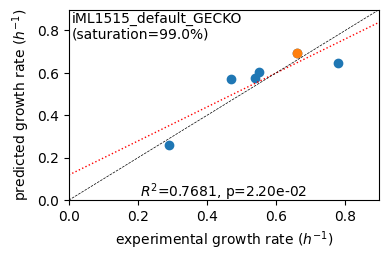

In [19]:
er.plot_grs(exp_grs, highlight='Glucose')

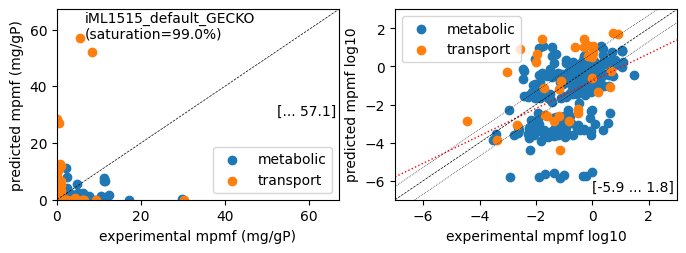

In [20]:
er.plot_proteins('Glucose', plot_fname=os.path.join('plots', f'{target_model}_proteins_Glucose.pdf'))    

### display results in Escher maps

Escher is a valuable tool for the visualization of flux distributions within a network context. In addition to its primary function, it can display protein and metabolite levels. The visual inspection of active/inactive pathways and reactions facilitates the interpretation of optimization results. The `EcmResults` module provides a method for exporting optimization results in a format compatible with Escher maps. Specifically, the `er.save_to_escher()` function exports optimization results to JSON-encoded files (.json), which can be imported by Escher. It should be noted that the function does not export records with absolute values less than $10^{-8}$. The function requires two parameters: first, the specific data, which can be tabulated with several conditions or a vector for a single condition; second, the base file name for the data files exported.

Subsequently, the optimization results can be visualized on Escher by following the procedure outlined below. First, access the Escher web portal (https://escher.github.io) and select and load the map entitled `Central metabolism (iJO1366)`, which we can use for iML1515. Then, choose `Data -> Load reaction data` and select one of the exported files in `./Escher`,  for example `iML1515_default_GECKO_Glucose_reaction_data.json`.

Escher Maps for **other organisms**:

The Escher web portal facilitates the generation of maps for other organisms, whether from the ground up or by updating existing maps. The portal's documentation provides detailed instructions for this process.

In [21]:
er.save_to_escher(df_net_fluxes, os.path.join('escher', target_model))
er.save_to_escher(df_proteins['Glucose'], os.path.join('escher', target_model))

6 file(s) exported for "Load reaction data" into Escher maps
1 file(s) exported for "Load gene data" into Escher maps


## (Optional) Track progress

In upcoming tutorials, we will try to improve the prediction quality of our initial GECKO model. For our reference condition, we will track the correlation of predicted to measured protein concentrations.

In [21]:
import scipy
import numpy as np

number = 1
xy = np.array([[df_mpmf.at[gene, reference_cond], df_proteins.at[gene, reference_cond]] 
                for gene in df_proteins.index if gene in df_mpmf.index])
log10_x, log10_y = er.get_log10_xy(xy)
lin_pearson_r, _ = scipy.stats.pearsonr(xy[:, 0], xy[:, 1])
log_pearson_r, _ = scipy.stats.pearsonr(log10_x, log10_y)

predictions = {}
data = [[number, target_model, lin_pearson_r**2,log_pearson_r**2, len(xy), len(log10_x)]]
cols = ['No', 'model', 'lin r2', 'log r2', 'lin proteins', 'log proteins']
predictions[reference_cond] = pd.DataFrame(data, columns=cols).set_index('No')
write_parameter_file('protein_predictions.xlsx', predictions)
predictions[reference_cond]

1 table(s) with parameters written to protein_predictions.xlsx


,model,lin r2,log r2,lin proteins,log proteins
No,,,,,
1,iML1515_default_GECKO,0.033244,0.190225,1018,299


## Closing remarks

We created an initial GECKO model based on the genome-scale metabolic model iML1515 of *E. coli*. Most of the additional parameters required for GECKO were configured with default values and values obtained automatically from online resources. We loaded the model into cobrapy and optimized it for maximum growth rate under different growth media conditions. 

While predicted growth rates correlate well with measured growth rates, the correlation of predicted to measured protein concentrations is not very good. In the linear protein correlation plot, we see proteins where the predicted concentrations are far from the measured ones, especially for transport-related proteins. 

In the next tutorial we will start to improve our initial GECKO model by selectively adjusting enzyme composition and turnover numbers related to transporters.

---
---
## (Alternative) gurobipy - model optimization

Above we used the cobrapy interface for model optimization. If you have Gurobi and gurobipy installed on your system, you can use gurobipy as an alternative interface for optimization. The gurobipy interface reduces the overhead imposed by cobrapy and can be significantly faster for large and complex models. However, there is no significant performance improvement when loading and optimizing GECKO models.

### A.1 gurobipy - model loading

We only need to pass the model filename when instantiating `EcmOptimization`. Access to variable bounds has changed and is provided by `eo.get_variable_bounds()`.

In [22]:
# Load model using gurobipy
fname = os.path.join('SBML_models', f'{target_model}.xml')
eo = EcmOptimization(fname)                              # ! gurobipy interface
total_protein = eo.get_variable_bounds('V_PC_total')['V_PC_total'][1]  # ! gurobipy interface
sigma = eo.avg_enz_saturation
all_genes = set(eo.m_dict['fbcGeneProducts']['label'].values)
tx_genes, metab_genes = eo.get_tx_metab_genes()
print(f'total modeled protein: {total_protein:.2f} mg/gDW, average saturation level: {sigma}')
print(f'{len(all_genes)} genes: ({len(tx_genes)}) transporter, ({len(metab_genes)}) metabolic')

SBML model loaded by sbmlxdf: SBML_models/iML1515_default_GECKO.xml (Thu Feb 12 15:15:26 2026)
LP Model of iML1515_GECKO
7372 variables, 3393 constraints, 28650 non-zero matrix coefficients
total modeled protein: 316.75 mg/gDW, average saturation level: 0.99
1515 genes: (498) transporter, (1017) metabolic


### A.2 gurobipy - model optimization

Note: Model contexts are supported by cobrapy, but not by the gurobipy interface.

In [23]:
# Optimize model using gurobipy
pred_results = {}
for cond, medium in conditions.items():
    eo.medium = medium
    solution = eo.optimize()
    if solution.status == 'optimal':
        gr = solution.objective_value
        pred_results[cond] = solution
        print(f'{cond:25s}: pred gr: {gr:.3f} h-1 vs. exp {exp_grs[cond]:.3f}, diff: {gr - exp_grs[cond]:6.3f}')
    else:    
        print(f'{cond} ended with status {solution.status}')

Acetate                  : pred gr: 0.261 h-1 vs. exp 0.290, diff: -0.029
Glycerol                 : pred gr: 0.569 h-1 vs. exp 0.470, diff:  0.099
Fructose                 : pred gr: 0.575 h-1 vs. exp 0.540, diff:  0.035
L-Malate                 : pred gr: 0.603 h-1 vs. exp 0.550, diff:  0.053
Glucose                  : pred gr: 0.692 h-1 vs. exp 0.660, diff:  0.032
Glucose 6-Phosphate      : pred gr: 0.648 h-1 vs. exp 0.780, diff: -0.132


### A.3 results analysis

Results analysis via `EcmResults` remains unchanged. We repeat the code from above to complete the gurobipy section.

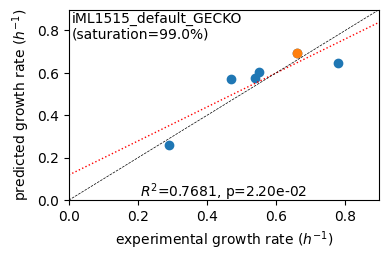

Protein mass fractions:
Acetate                  : r² = 0.0631, p = 4.07e-16 (1018 proteins lin scale)
Glycerol                 : r² = 0.0532, p = 9.12e-14 (1018 proteins lin scale)
Fructose                 : r² = 0.1060, p = 1.42e-26 (1018 proteins lin scale)
Glucose                  : r² = 0.0332, p = 4.64e-09 (1018 proteins lin scale)
Acetate                  : r² = 0.1808, p = 7.24e-15 ( 306 proteins log scale)
Glycerol                 : r² = 0.1569, p = 5.65e-13 ( 307 proteins log scale)
Fructose                 : r² = 0.1556, p = 9.21e-13 ( 304 proteins log scale)
Glucose                  : r² = 0.1902, p = 2.58e-15 ( 299 proteins log scale)

condition: Glucose
1515 proteins in model with total predicted mass fraction of 555.7 mg/gP
     1018 have been measured with mpmf of  555.6 mg/gP vs. 426.8 mg/gP predicted
           777 metabolic proteins measured 423.9 mg/gP vs. 181.3 mg/gP predicted
           241 transport proteins measured 131.7 mg/gP vs. 245.5 mg/gP predicted
      49

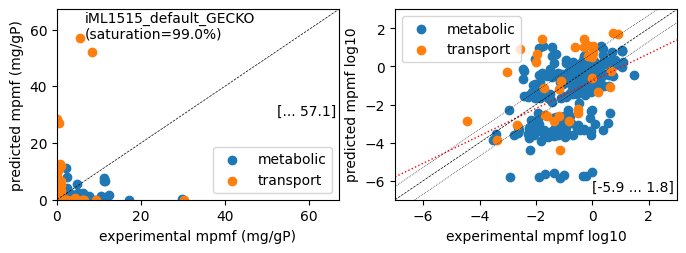

1 file(s) exported for "Load reaction data" into Escher maps


In [24]:
# Analyse results
er = EcmResults(eo, pred_results, df_mpmf)
df_fluxes = er.collect_fluxes()
df_net_fluxes = er.collect_fluxes(net=True)
df_proteins = er.collect_protein_results()
er.plot_grs(exp_grs, highlight='Glucose')
print(f'Protein mass fractions:')
er.report_proteomics_correlation(scale='lin')
er.report_proteomics_correlation(scale='log')
print()
er.report_protein_levels('Glucose')
er.plot_proteins('Glucose', plot_fname=os.path.join('plots', f'{target_model}_proteins_Glucose.pdf'))    
er.save_to_escher(df_net_fluxes['Glucose'], os.path.join('escher', target_model))

---
---
## References

- Adadi, R., Volkmer, B., Milo, R., Heinemann, M., & Shlomi, T. (2012). Prediction of Microbial Growth Rate versus Biomass Yield by a Metabolic Network with Kinetic Parameters. PLOS Computational Biology, 8(7), e1002575. https://doi.org/10.1371/journal.pcbi.1002575 
- Alberty, R. A. (2005). Thermodynamics of Biochemical Reactions. Massachusetts Institute of Technology Press, Cambridge, MA. 
- Bornstein, B. J., Keating, S. M., Jouraku, A., & Hucka, M. (2008). LibSBML: an API Library for SBML. Bioinformatics, 24(6), 880-881. https://doi.org/10.1093/bioinformatics/btn051 
- Bremer, H., & Dennis, P. P. (2008). Modulation of Chemical Composition and Other Parameters of the Cell at Different Exponential Growth Rates. EcoSal Plus, 3(1). https://doi.org/10.1128/ecosal.5.2.3 
- Breuer, M., Earnest, T. M., Merryman, C., Wise, K. S., Sun, L., Lynott, M. R., Hutchison, C. A., Smith, H. O., Lapek, J. D., Gonzalez, D. J., de Crécy-Lagard, V., Haas, D., Hanson, A. D., Labhsetwar, P., Glass, J. I., & Luthey-Schulten, Z. (2019). Essential metabolism for a minimal cell. Elife, 8. https://doi.org/10.7554/eLife.36842 
- Bulović, A., Fischer, S., Dinh, M., Golib, F., Liebermeister, W., Poirier, C., Tournier, L., Klipp, E., Fromion, V., & Goelzer, A. (2019). Automated generation of bacterial resource allocation models. Metabolic Engineering, 55, 12-22. https://doi.org/https://doi.org/10.1016/j.ymben.2019.06.001 
- Desouki, A. A. (2015). sybilccFBA: Cost Constrained FLux Balance Analysis: MetabOlic Modeling with ENzyme kineTics (MOMENT). In CRAN. http://cran.nexr.com/web/packages/sybilccFBA/sybilccFBA.pdf
- Desouki, A. A. (2016). Algorithms for improving the predictive power of flux balance analysis Heinrich Heine University Duesseldorf]. 
- Dourado, H., & Lercher, M. J. (2020). An analytical theory of balanced cellular growth. Nat Commun, 11(1), 1226. https://doi.org/10.1038/s41467-020-14751-w 
- Ebrahim, A., Lerman, J. A., Palsson, B. O., & Hyduke, D. R. (2013). COBRApy: COnstraints-Based Reconstruction and Analysis for Python. BMC Systems Biology, 7(1), 74. https://doi.org/10.1186/1752-0509-7-74 
- Goelzer, A., Fromion, V., & Scorletti, G. (2011). Cell design in bacteria as a convex optimization problem. Automatica, 47(6), 1210-1218. https://doi.org/https://doi.org/10.1016/j.automatica.2011.02.038 
- Henry, C. S., Broadbelt, L. J., & Hatzimanikatis, V. (2007). Thermodynamics-based metabolic flux analysis. Biophys J, 92(5), 1792-1805. https://doi.org/10.1529/biophysj.106.093138 
- Henry, C. S., DeJongh, M., Best, A. A., Frybarger, P. M., Linsay, B., & Stevens, R. L. (2010). High-throughput generation, optimization and analysis of genome-scale metabolic models. Nat Biotechnol, 28(9), 977-982. https://doi.org/10.1038/nbt.1672 
- Huang, Q., Szklarczyk, D., Wang, M., Simonovic, M., & von Mering, C. (2023). PaxDb 5.0: Curated Protein Quantification Data Suggests Adaptive Proteome Changes in Yeasts. Mol Cell Proteomics, 22(10), 100640. https://doi.org/10.1016/j.mcpro.2023.100640 
- Hucka, M., Bergmann, F. T., Chaouiya, C., Dräger, A., Hoops, S., Keating, S. M., König, M., Novère, N. L., Myers, C. J., Olivier, B. G., Sahle, S., Schaff, J. C., Sheriff, R., Smith, L. P., Waltemath, D., Wilkinson, D. J., & Zhang, F. (2019). The Systems Biology Markup Language (SBML): Language Specification for Level 3 Version 2 Core Release 2. J Integr Bioinform, 16(2). https://doi.org/10.1515/jib-2019-0021 
- Jankowski, M. D., Henry, C. S., Broadbelt, L. J., & Hatzimanikatis, V. (2008). Group contribution method for thermodynamic analysis of complex metabolic networks. Biophys J, 95(3), 1487-1499. https://doi.org/10.1529/biophysj.107.124784 
- Kanehisa, M., & Goto, S. (2000). KEGG: kyoto encyclopedia of genes and genomes. Nucleic Acids Res, 28(1), 27-30. https://doi.org/10.1093/nar/28.1.27 
- Karp, P. D., Billington, R., Caspi, R., Fulcher, C. A., Latendresse, M., Kothari, A., Keseler, I. M., Krummenacker, M., Midford, P. E., Ong, Q., Ong, W. K., Paley, S. M., & Subhraveti, P. (2017). The BioCyc collection of microbial genomes and metabolic pathways. Briefings in Bioinformatics, 20(4), 1085-1093. https://doi.org/10.1093/bib/bbx085 
- King, Z. A., Dräger, A., Ebrahim, A., Sonnenschein, N., Lewis, N. E., & Palsson, B. O. (2015). Escher: A Web Application for Building, Sharing, and Embedding Data-Rich Visualizations of Biological Pathways. PLOS Computational Biology, 11(8), e1004321. https://doi.org/10.1371/journal.pcbi.1004321 
- King, Z. A., Lu, J., Dräger, A., Miller, P., Federowicz, S., Lerman, J. A., Ebrahim, A., Palsson, B. O., & Lewis, N. E. (2015). BiGG Models: A platform for integrating, standardizing and sharing genome-scale models. Nucleic Acids Research, 44(D1), D515-D522. https://doi.org/10.1093/nar/gkv1049 
- Kroll, A., Rousset, Y., Hu, X.-P., Liebrand, N. A., & Lercher, M. J. (2023). Turnover number predictions for kinetically uncharacterized enzymes using machine and deep learning. Nature Communications, 14(1), 4139. https://doi.org/10.1038/s41467-023-39840-4 
- Monk, J. M., Lloyd, C. J., Brunk, E., Mih, N., Sastry, A., King, Z., Takeuchi, R., Nomura, W., Zhang, Z., Mori, H., Feist, A. M., & Palsson, B. O. (2017). iML1515, a knowledgebase that computes Escherichia coli traits. Nat Biotechnol, 35(10), 904-908. https://doi.org/10.1038/nbt.3956 
- Nogales, J., Gudmundsson, S., Knight, E. M., Palsson, B. O., & Thiele, I. (2012). Detailing the optimality of photosynthesis in cyanobacteria through systems biology analysis. Proc Natl Acad Sci U S A, 109(7), 2678-2683. https://doi.org/10.1073/pnas.1117907109 
- Orth, J. D., Fleming, R. M., & Palsson, B. (2010a). Reconstruction and Use of Microbial Metabolic Networks: the Core Escherichia coli Metabolic Model as an Educational Guide. EcoSal Plus, 4(1). https://doi.org/10.1128/ecosalplus.10.2.1 
- Orth, J. D., Thiele, I., & Palsson, B. Ø. (2010b). What is flux balance analysis? , 28(3), 245-248. https://doi.org/10.1038/nbt.1614 
- Salvy, P., Fengos, G., Ataman, M., Pathier, T., Soh, K. C., & Hatzimanikatis, V. (2019). pyTFA and matTFA: a Python package and a Matlab toolbox for Thermodynamics-based Flux Analysis. Bioinformatics, 35(1), 167-169. https://doi.org/10.1093/bioinformatics/bty499 
- Sánchez, B. J., Zhang, C., Nilsson, A., Lahtvee, P. J., Kerkhoven, E. J., & Nielsen, J. (2017). Improving the phenotype predictions of a yeast genome‐scale metabolic model by incorporating enzymatic constraints. Molecular Systems Biology, 13(8), 935. https://doi.org/https://doi.org/10.15252/msb.20167411 
- Schmidt, A., Kochanowski, K., Vedelaar, S., Ahrné, E., Volkmer, B., Callipo, L., Knoops, K., Bauer, M., Aebersold, R., & Heinemann, M. (2016). The quantitative and condition-dependent Escherichia coli proteome. Nature Biotechnology, 34(1), 104-110. https://doi.org/10.1038/nbt.3418 
- Schoch, C. L., Ciufo, S., Domrachev, M., Hotton, C. L., Kannan, S., Khovanskaya, R., Leipe, D., McVeigh, R., O’Neill, K., Robbertse, B., Sharma, S., Soussov, V., Sullivan, J. P., Sun, L., Turner, S., & Karsch-Mizrachi, I. (2020). NCBI Taxonomy: a comprehensive update on curation, resources and tools. Database, 2020, baaa062. https://doi.org/10.1093/database/baaa062 
- The UniProt, C. (2023). UniProt: the Universal Protein Knowledgebase in 2023. Nucleic Acids Research, 51(D1), D523-D531. https://doi.org/10.1093/nar/gkac1052 
- Watson, M. R. (1986). A discrete model of bacterial metabolism. 2(1), 23-27. https://doi.org/10.1093/bioinformatics/2.1.23 
- Zhang, C., Sánchez, B. J., Li, F., Eiden, C. W. Q., Scott, W. T., Liebal, U. W., Blank, L. M., Mengers, H. G., Anton, M., Rangel, A. T., Mendoza, S. N., Zhang, L., Nielsen, J., Lu, H., & Kerkhoven, E. J. (2024). Yeast9: a consensus genome-scale metabolic model for S. cerevisiae curated by the community. Mol Syst Biol, 20(10), 1134-1150. https://doi.org/10.1038/s44320-024-00060-7 